# AIM0407D2203 Lab 3 Named Entity Recognition (NER)
---

Pada materi kali ini kita akan belajar mengenai Named Entity Recognition. Named Entity Recognition (NER) adalah salah satu tugas preprocessing pada Natural Language Processing (NLP) untuk mengesktrak informasi berupa entitas nyata berbentuk string seperti:


*   Person
*   Organization
*   Location
*   dll.

Entitas lain dapat berupa merk, mata uang, tanggal, pekerjaan/jabatan.



Apa Kegunaan Named Entity Recognition ?

<table>   
  <tr>     
    <td><img src="https://drive.google.com/uc?export=view&id=1ggLWQnQYo26cUT5Nr23Gu3d263FUkUrj"  width="300" height="300"></td>     
    <td>
    NER dapat menjadi langkah awal untuk membangun:

    Mesin terjemahan, question answering atau mesin pencari.
    Bayangkan anda ingin mencari kata kunci 
    
    'kucing di atas kijang' 
    
    atau ingin menerjemahkan kalimat 

    'suci sekolah di menteng'.
    
    maka kita ingin mesin memahami suci berupa
    nama orang dan kijang adalah nama produk bukan hewan</td>   
  </tr> 
</table>

Bagaimana NER Bekerja?  
>NER setidaknya memiliki 2 tahapan yakni: 
1.   Mendeteksi entitas yang ada pada teks
2.   Mengklasifikasikan entitas tadi berdasarkan kategori yang telah ditentukan

Bagaimana melatih model untuk Named Entity Recognition ?
> NER dapat dikategorikan sebagai model supervised learning. Maka dari itu kita membutuhkan data berlabel. SpaCy sebagai library menyediakan model terlatih yang dapat digunakan untuk prediksi NER berbahasa inggris.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import spacy
import pandas as pd
from spacy.tokens import DocBin
from tqdm import tqdm
import requests
import html5lib
import os
from spacy import displacy
from bs4 import BeautifulSoup as bs

In [ ]:
#load model SpaCy
nlp = spacy.load('en_core_web_sm')

text = '''The Python programming language lies behind an enormous variety of software applications today, 
many of which affect our daily lives in ways both large and small. First released by its creator Guido van Rossum 
in 1991, Python has undergone continual improvement and has become a powerful yet flexible and easy-to- learn 
“Swiss Army knife” for programmers. Computer system administrators use it to solve daily problems quickly and 
developers can use it to build massive enterprise-scale websites. It is used in machine learning, banking, 
scientific computing, education, video games, math, physics, engineering, and for fast software prototyping 
by thousands of entities, including Autodesk, Google,Facebook, Microsoft, Dropbox, Alibaba, NASA, IBM, and 
hundreds of universities around the world. UC Berkeley and MIT are known to use it in their undergraduate programming courses.'''

doc = nlp(text)

sentences = list(doc.sents)

# tokenization
ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents]

#print(ents) #print untuk mengetahui entiti yang telah diprediksi

# displacy digunakan untuk memvisualkan hasil prediksi NER
displacy.render(doc, style='ent', jupyter=True)

Bagaimana SpaCy melatih model untuk NER ?
> NER menggunakan Backpropagation dengan menghitung gradient guna memprediksi label. Model yang telah dilatih (pretrained model) dapat dilatih lagi dengan data yang baru untuk mengupdate parameter model. Tentu model yang diharapkan tidak mengingat data yang telah dilatih melainkan model diharapkan mampu men-Generalisasi setiap unseen data. Akibatnya, model dapat membedakan kata 'Amazon' sebagai nama sungai (lokasi) atau 'Amazon' sebagai merk dagang  

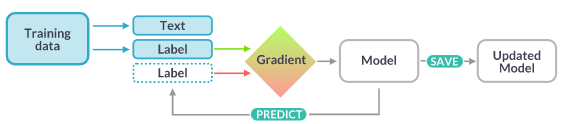

---
Alur Model


Bagaimana melatih model untuk Bahasa Indonesia ?
>Melatih model bahasa yang tidak tersedia model bahasanya oleh SpaCy mengharuskan kita melatih model dari awal. Spacy menyediakan method untuk meload model baru:
```
spacy.blank("id")
```

Namun sebelum itu, kita butuh data yang telah terlabel. Pada kesempatan ini kita akan melakukan scrapping data teks pada website, lalu melabeli teks tersebut.

In [ ]:
link = 'https://republika.co.id/berita/qcsbt4383/akhlak-sebagai-emcore-valueem-bumn-erick-thohir-bismillah'
req = requests.get(link)
soup = bs(req.content, 'html5lib')

# Perintah untuk memperoleh teks utama pada web
paragraphs = soup.findAll('p')

text = []
for p in paragraphs:
    text.append(p.text)
    
# menggabungkan keseluruhan teks
text_ready = ' '.join(text[5:7])

In [ ]:
#Buat file baru bernama 'berita.txt'
text_file = open("/content/drive/MyDrive/BATCH 3/Dataset/berita.txt", "w")
#write teks yang telah bersih tadi pada file 'berita.txt'
text_file.write(text_ready)
#close file
text_file.close()

Bagaimana melabeli (anotasi) manual data teks tadi ?
> Kita dapat menggunakan web berikut: 
https://tecoholic.github.io/ner-annotator/


Apa yang perlu dilakukan setelah teks dilabeli ?
>Load data tersebut, namun perlu diperhatikan dataset berupa .json file maka perlu ubah data yang telah terlabel dengan format yang diminta SpaCy

In [ ]:
import json
f = open('/content/drive/MyDrive/BATCH 3/Dataset/annotations.json')
TRAIN_DATA = json.load(f)

In [ ]:
TRAIN_DATA

{'classes': ['ORGANIZATION', 'PERSON'],
 'annotations': [['Menteri BUMN Erick Thohir meluncurkan logo baru Kementerian BUMN di halaman kantor Kementerian BUMN, Jakarta, Rabu (1/7).   REPUBLIKA.CO.ID, JAKARTA -- Menteri Badan Usaha Milik Negara (BUMN) Erick Thohir secara resmi menetapkan akhlak sebagai core value dari BUMN pada Rabu (1/7). Penetapan akhlak sebagai core value BUMN bersamaan dengan acara perubahan logo dan slogan Kementerian BUMN.',
   {'entities': [[8, 12, 'ORGANIZATION'],
     [13, 25, 'PERSON'],
     [60, 64, 'ORGANIZATION'],
     [95, 99, 'ORGANIZATION'],
     [152, 159, 'PERSON'],
     [160, 184, 'ORGANIZATION'],
     [186, 190, 'ORGANIZATION'],
     [192, 204, 'PERSON'],
     [260, 264, 'ORGANIZATION'],
     [318, 322, 'ORGANIZATION'],
     [384, 389, 'ORGANIZATION']]}]]}

In [ ]:
nlp = spacy.blank("id") # load model baru
db = DocBin() # Buat DocBin object

#berikut adalah proses mengubah '.json' file ke format '.spacy'
for text, annot in tqdm(TRAIN_DATA['annotations']): 
    doc = nlp.make_doc(text) 
    # print('text: ',text)
    # print('annot: ',annot)
    ents = []
    for start, end, label in annot["entities"]:
        # print('start: ',start)
        # print('end: ',end)
        # print('label: ',label)
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        # print('span :',span)
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents 
    # print('ents: ',ents)
    # print('doc.ents: ',doc.ents)
    db.add(doc)

db.to_disk("./training_data.spacy")

100%|██████████| 1/1 [00:00<00:00, 236.67it/s]


In [ ]:
#buat model
! python -m spacy init config config.cfg --lang id --pipeline ner --optimize efficiency

2022-09-07 15:09:41.514944: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: id
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
#latih model
! python -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

2022-09-07 15:10:36.457817: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-09-07 15:10:39,669] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2022-09-07 15:10:39,678] [INFO] Pipeline: ['tok2vec', 'ner']
INFO:spacy:Pipeline: ['tok2vec', 'ner']
[2022-09-07 15:10:39,682] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2022-09-07 15:10:39,683] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2022-09-07 15:10:39,740] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #  

In [ ]:
#load model yang telah dilatih
nlp_ner = spacy.load("/content/model-best")

In [ ]:
doc = nlp_ner('Menteri Energi dan Sumber Daya Mineral (ESDM) mengumumkan bahwa harga BBM bersubdisi naik mulai pukul 14.30 WIB.')

In [ ]:
spacy.displacy.render(doc, style="ent", jupyter=True)

Data yang baik menghasilkan prediksi yang tentu lebih baik
>NER adalah supervised learning, maka dibutuhkan banyak data yang telah berlabel. Tentu data yang telah terlabel oleh ahli adalah data yang dibutuhkan (dibanding anotasi manual). Maka dari itu, perlu memperoleh data opensource untuk melatih model Spacy

In [ ]:
#download data dari: https://github.com/yudanta/indonesia-ner-spacy/blob/main/ner_spacy_fmt_datasets.pickle
with open('/content/drive/MyDrive/BATCH 3/Dataset/ner_spacy_fmt_datasets.pickle', 'rb') as f:
    TRAIN_DATA = pickle.load(f)

In [ ]:
for i in range(3):
  print(TRAIN_DATA[i])

('Pengamat politik dari Universitas Gadjah Mada Arie Sudjito menilai, keinginan Ketua Umum Partai Golkar Aburizal Bakrie untuk maju kembali sebagai ketua umum merupakan pemaksaan kehendak.', {'entities': [(22, 45, 'ORGANIZATION'), (46, 58, 'PERSON'), (89, 102, 'ORGANIZATION'), (103, 118, 'PERSON')]})
('Menurut dia, ada kesan bahwa Aburizal menggunakan segala cara untuk memuluskan jalannya kembali menduduki Golkar 1.', {'entities': [(29, 37, 'PERSON'), (106, 112, 'ORGANIZATION')]})
('Hal ini, kata Arie berpotensi menimbukan perpecahan di kalangan kader Golkar di daerah.', {'entities': [(14, 18, 'PERSON'), (70, 76, 'PERSON')]})


Bandingkan format data yang tersedia di github dengan format data latih yang ada pada tahap sebelumnya !
>Pada data yang tersedia, sayang label indeks entiti data yang tersedia terpisah antar kalimat sementara SpaCy mengharapkan data berupa satu indeks dokumen utuh

Pada kesempatan kali ini kita akan mencoba melatih model dengan 1 kalimat yang ada pada github

In [ ]:
nlp = spacy.blank("id")
# the DocBin will store the example documents
db = DocBin()
for text, annotations in [TRAIN_DATA[0]]:
    doc = nlp(text)
    ents = []
    for start, end, label in annotations['entities']:
        span = doc.char_span(start, end, label=label)
        ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("./train_new.spacy")

In [ ]:
ents

[Universitas Gadjah Mada, Arie Sudjito, Partai Golkar, Aburizal Bakrie]

In [ ]:
! python -m spacy init config config.cfg --lang id --pipeline ner --optimize efficiency

2022-09-07 15:25:00.856156: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

✘ The provided output file already exists. To force overwriting the
config file, set the --force or -F flag.



In [ ]:
! python -m spacy train config.cfg --output ./ --paths.train ./train_new.spacy --paths.dev ./train_new.spacy

2022-09-07 15:25:04.535833: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-09-07 15:25:07,836] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2022-09-07 15:25:07,845] [INFO] Pipeline: ['tok2vec', 'ner']
INFO:spacy:Pipeline: ['tok2vec', 'ner']
[2022-09-07 15:25:07,848] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2022-09-07 15:25:07,849] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2022-09-07 15:25:07,903] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #  

In [ ]:
nlp_ner = spacy.load("/content/model-best")

In [ ]:
doc = nlp_ner('Menteri Energi dan Sumber Daya Mineral (ESDM) mengumumkan bahwa harga BBM bersubdisi naik mulai pukul 14.30 WIB.')

In [ ]:
spacy.displacy.render(doc, style="ent", jupyter=True)

####Student Activity

Pada percobaan di atas kamu telah melihat pentingnya NER dan data yang telah memiliki label untuk melatih NER. Diskusikanlah hal berikut:


1.   Seberapa penting data yang memiliki label menurut pendapatmu ? apakah data yang dilabeli satu orang sama pentingnya dengan data yang dilabeli lebih dari satu orang (misalkan hasil labelling dua orang tersebut dibobotkan)
2.   Bagaimana cara melabeli data yang baik ? Cari tahu salah satu metodenya dan coba kemukakan.

